In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

In [5]:
# Load the dataset
data = pd.read_csv('/config/workspace/Dataset/house_price_prediction_dataset.csv')

# Display the first few rows of the dataset
data.head()


,num_bedrooms,num_bathrooms,square_footage,lot_size,age_of_house,proximity_to_city_center,neighborhood_quality,house_price
0,4,2,855,5089,13,8,9,490699.5962
1,5,3,3424,2865,40,15,2,521249.9317
2,3,2,3115,6600,1,18,3,555975.1111
3,5,2,2916,7055,18,7,5,596433.3829
4,5,3,2551,1004,79,19,10,511950.6382


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_bedrooms              5000 non-null   int64  
 1   num_bathrooms             5000 non-null   int64  
 2   square_footage            5000 non-null   int64  
 3   lot_size                  5000 non-null   int64  
 4   age_of_house              5000 non-null   int64  
 5   proximity_to_city_center  5000 non-null   int64  
 6   neighborhood_quality      5000 non-null   int64  
 7   house_price               5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [7]:
# Check for missing values
data.isnull().sum()

num_bedrooms                0
num_bathrooms               0
square_footage              0
lot_size                    0
age_of_house                0
proximity_to_city_center    0
neighborhood_quality        0
house_price                 0
dtype: int64

In [8]:
# Display basic statistical details of the dataset
data.describe()


,num_bedrooms,num_bathrooms,square_footage,lot_size,age_of_house,proximity_to_city_center,neighborhood_quality,house_price
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.010800,1.99780,2152.563000,5493.568000,49.905000,10.040800,5.569600,459832.794183
std,1.424601,0.81014,764.553954,2619.379674,29.125062,5.427101,2.843303,81437.536298
min,1.000000,1.00000,800.000000,1000.000000,0.000000,1.000000,1.000000,185517.796400
25%,2.000000,1.00000,1503.750000,3202.750000,25.000000,5.000000,3.000000,404045.735500
50%,3.000000,2.00000,2159.000000,5521.000000,50.000000,10.000000,6.000000,459209.926050
75%,4.000000,3.00000,2787.250000,7729.500000,75.000000,15.000000,8.000000,518571.537825
max,5.000000,3.00000,3499.000000,9998.000000,99.000000,19.000000,10.000000,752510.151200


In [9]:
# Define the features (independent variables) and target (dependent variable)
features = ['num_bedrooms', 'num_bathrooms', 'square_footage', 'age_of_house', 'proximity_to_city_center']
X = data[features]
y = data['house_price']


In [10]:
# Data Analytics: Visualizing relationships between selected features and target variable
#sns.pairplot(data[features + ['house_price']])
#plt.show()

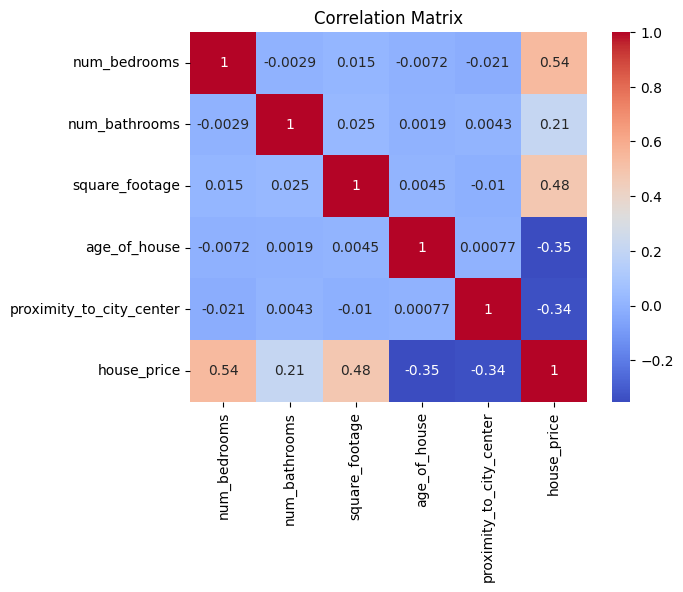

In [11]:
# Correlation matrix
correlation_matrix = data[features + ['house_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


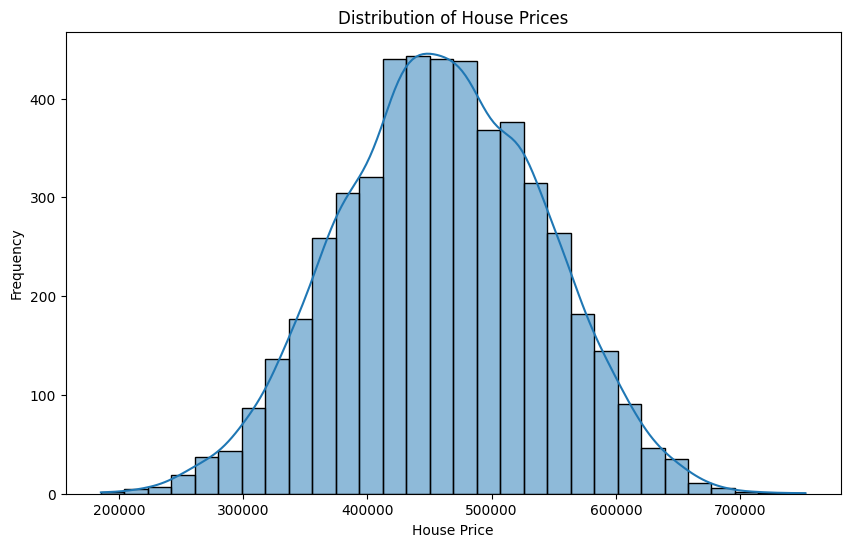

In [12]:
# Distribution of the target variable (house price)
plt.figure(figsize=(10, 6))
sns.histplot(data['house_price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()


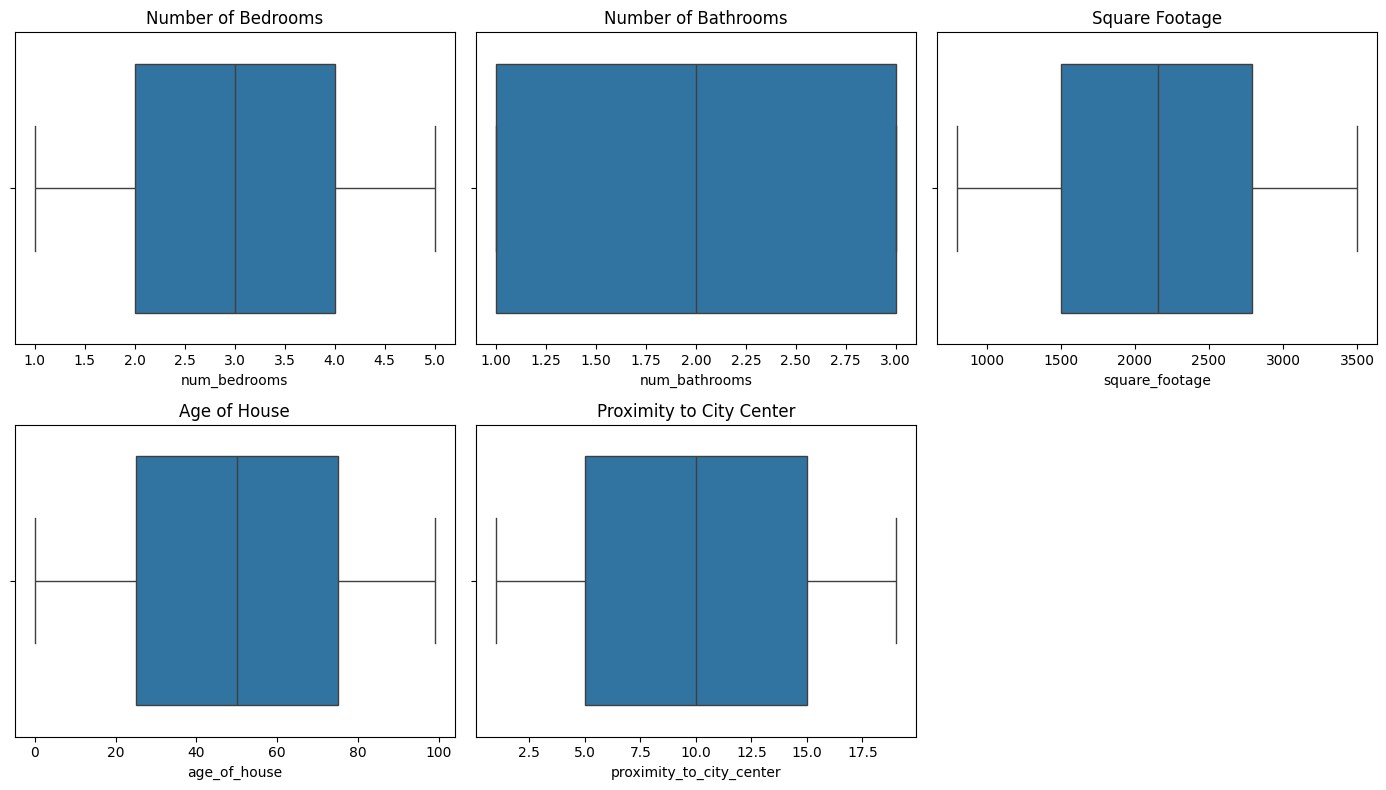

In [13]:
# Boxplots to visualize the distribution of selected features
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x=data['num_bedrooms'])
plt.title('Number of Bedrooms')

plt.subplot(2, 3, 2)
sns.boxplot(x=data['num_bathrooms'])
plt.title('Number of Bathrooms')

plt.subplot(2, 3, 3)
sns.boxplot(x=data['square_footage'])
plt.title('Square Footage')

plt.subplot(2, 3, 4)
sns.boxplot(x=data['age_of_house'])
plt.title('Age of House')

plt.subplot(2, 3, 5)
sns.boxplot(x=data['proximity_to_city_center'])
plt.title('Proximity to City Center')

plt.tight_layout()
plt.show()

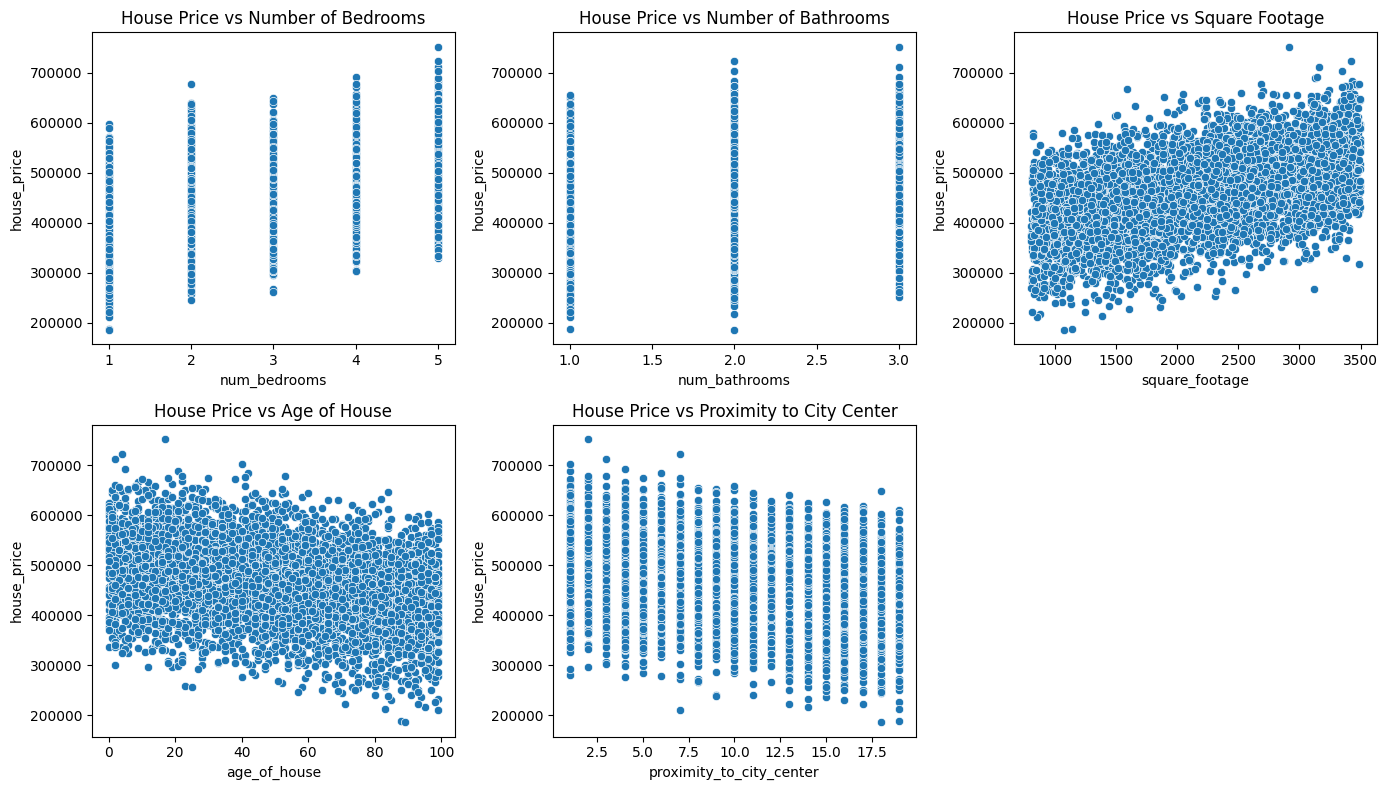

In [14]:

# Scatter plots to visualize relationships with house price
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.scatterplot(x=data['num_bedrooms'], y=data['house_price'])
plt.title('House Price vs Number of Bedrooms')

plt.subplot(2, 3, 2)
sns.scatterplot(x=data['num_bathrooms'], y=data['house_price'])
plt.title('House Price vs Number of Bathrooms')

plt.subplot(2, 3, 3)
sns.scatterplot(x=data['square_footage'], y=data['house_price'])
plt.title('House Price vs Square Footage')

plt.subplot(2, 3, 4)
sns.scatterplot(x=data['age_of_house'], y=data['house_price'])
plt.title('House Price vs Age of House')

plt.subplot(2, 3, 5)
sns.scatterplot(x=data['proximity_to_city_center'], y=data['house_price'])
plt.title('House Price vs Proximity to City Center')

plt.tight_layout()
plt.show()

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Apply Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
#y_pred

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1403003621.427377
R-squared: 0.7953085275442244


In [20]:
# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


                           Coefficient
num_bedrooms              41920.566801
num_bathrooms             16143.779545
square_footage            38147.715513
age_of_house             -28448.672485
proximity_to_city_center -26572.553330


## Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [23]:
# Save the standard scaler and model to pickle files
with open('/config/workspace/Model/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('/config/workspace/Model/linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    

In [26]:
# model.predict(scaler.transform(X_test))